# Hessian Matrix

In [2]:
import pandas as pd
import numpy as np
import re
from sympy import *
import math

In [3]:
# Showing how to extract symbols, it's always in alphabetical order
x, y, z = symbols('x, y, z')
multivar_exp = eval('z + y + x')
print(multivar_exp.free_symbols)

one, two, three = symbols('x_1 x_2 x_3')
multivar_exp = eval('three + two + one')
print('Free symbols:', multivar_exp.free_symbols)

# Showing how indices are rendered
print('Rendering the expression:', multivar_exp)

{x, z, y}
Free symbols: {x_1, x_3, x_2}
Rendering the expression: x_1 + x_2 + x_3


In [4]:
# Fixing ugly printing
init_printing()
display('Pretty rendering with display():', multivar_exp)

'Pretty rendering with display():'

' with (-4, -2):'

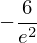

In [72]:
def evaluate_value(func, symbol_list, point):
    """
    Takes point tuple for evaluation, with variables in alphabetical order.
    fails if all symbols aren't mapped, returns numerical evaluation
    """
    if len(symbol_list) != len(point):
        print(symbol_list)
        print(point)
        raise ValueError('Unmatched argument sizes')
    result = func.copy()
    for symbol, value in zip(symbol_list, point):
        result = result.subs(symbol, value)
    return result

x = Symbol('x')
y = Symbol('y')
example_func = eval('exp(x-y)*(x**2-2*y**2+4*x+2)')
syms = list(example_func.free_symbols)
display(example_func, syms, ' with (-4, -2):')
display(evaluate_value(example_func, syms, (-4, -2)))
        

In [9]:
def gradient(func, symbol_list):
    """ Returns list of derivatives for each free symbol (in alphabetical order) """
    partial_derivatives = []
    for symbol in symbol_list:
        partial_derivatives.append(diff(func, symbol))
    return partial_derivatives

x1, x2 = symbols('x y')
example_func = eval('exp(x-y)*(x**2-2*y**2)')
print('Gradient example using:')
display(example_func)
print('All partial derivatives:')
display(gradient(example_func, example_func.free_symbols))

Gradient example using:


All partial derivatives:


In [11]:
def calcul_hessian_matrix(func):
    """
    Calculate the hessian matrix of the function.
    """
    syms = func.free_symbols
    partial_derivates = gradient(func, syms)
    partial_derivates_second = []

    for derivate in partial_derivates:
        partial_derivates_second.append(factor(gradient(derivate, syms)))
    hessian_matrix = Matrix(partial_derivates_second)
    return hessian_matrix

In [20]:
def calculate_determinate(func, point):
    """
    Calculate the determinant based on the hessian matrix of the function.
    """
    syms = func.free_symbols
    return evaluate_value(calcul_hessian_matrix(func), syms, point).det()

In [17]:
def calculate_trace(func, point):
    """
    Calculate the trace based on the hessian matrix of the function.
    """
    hessian = calcul_hessian_matrix(func)
    syms = func.free_symbols
    eigenvals = evaluate_value(hessian, syms, point).eigenvals()
    # Trace definition, multiplying for multiplicity
    trace = sum([k*v for k, v in eigenvals.items()])
    return trace.simplify()

In [18]:
def is_critical_point(func, point):
    hessian = calcul_hessian_matrix(func)
    if calculate_determinate(func, point) > 0:
        trace = calculate_trace(func, point)
        if trace > 0 :
            return 'The function has a minimum.'
        elif trace < 0:
            return  'The function has a maximum.'
    return 'The function has no minimum or maximum.'

In [50]:
x = Symbol('x')
y = Symbol('y')
example_func_1 = eval('exp(x-y)*(x**2-2*y**2)')
example_func_2 = eval('x**2-cos(y)')
print('Gradient example using:')



# Case study maximum
display(example_func_1)
print(is_critical_point(example_func_1, (-4,-2)), (-4, -2))
print(is_critical_point(example_func_1, (0, 0)), (0, 0))
print()
display(example_func_2)
print(is_critical_point(example_func_2, (0, math.pi)), (0, math.pi))

print(is_critical_point(example_func_2, (0, 2*math.pi)), (0, 2*math.pi))

Gradient example using:


The function has a maximum. (-4, -2)
The function has no minimum or maximum. (0, 0)



The function has no minimum or maximum. (0, 3.141592653589793)
The function has a minimum. (0, 6.283185307179586)


### Gradient Descent

Starting gradient descent for:


Settings: alpha=0.02, epsilon=0.001, iterations=3000
Mode: maximize


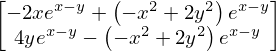

Descent finished, at point: Matrix([[-3.96569690543399], [-1.97623271798963]])
The function has a maximum.


In [88]:
def gradient_descent(func, starting_point, alpha=0.02, minimize=True):
    print('Starting gradient descent for:')
    display(func)
    iterations = 3000
    epsilon = 0.001
    print(f'Settings: alpha={alpha}, epsilon={epsilon}, iterations={iterations}')
    mode = 'minimize' if (minimize) else 'maximize'
    print(f'Mode: {mode}')
    optim_func = func if minimize else func*(-1)
        
    point = starting_point
    syms = list(func.free_symbols)
    
    gradient_function = Matrix(gradient(optim_func, syms))
    display(gradient_function)
    for i in range(iterations):
        grad = evaluate_value(gradient_function, syms, point)
        point = (point-alpha*grad).evalf()
        if grad.norm() < epsilon:
            print(f'Gradient small enough, terminating at iteration {i}')
            break
    print('Descent finished, at point:', point)
    print(is_critical_point(func, point))
start_point = Matrix([-1, -1])
gradient_descent(example_func_1, start_point, minimize=False)


Starting gradient descent for:


Settings: alpha=0.02, epsilon=0.001, iterations=3000
Mode: minimize


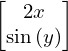

Gradient small enough, terminating at iteration 399
Descent finished, at point: Matrix([[8.10015288223532e-8], [0.000975676412069820]])
The function has a minimum.


In [89]:
start_point = Matrix([1, 2])
gradient_descent(example_func_2, start_point, minimize=True)